In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib notebook
warnings.filterwarnings('ignore')
import seaborn as sns


deep=pd.read_csv('deep2.dr4.groupcat-realspace.csv',header=None)
deep_hdu2=pd.read_csv('deep2.dr4.groupcat-hdu2.csv',header=None)
deep_hdu1=pd.read_csv('deep2.dr4.groupcat-hdu1.csv',header=None)

deep.columns=['x','y','z']
deep_hdu1.columns=['OBJNO','RA','DEC','Z','CLUSTNUM']
deep_hdu2.columns=['CLUSTNUM','FIELD','RA','DEC','Z','VDISP','N_MEMBERS','HIGHPURITY']



In [14]:
deep.head()

,x,y,z
0,-940.094443,-676.390092,1573.935816
1,-1484.547239,-1071.348727,2487.020365
2,-1758.946885,-1271.006815,2948.346646
3,-1030.100331,-744.202853,1725.257203
4,-1576.934801,-1141.126255,2642.620590


<IPython.core.display.Javascript object>


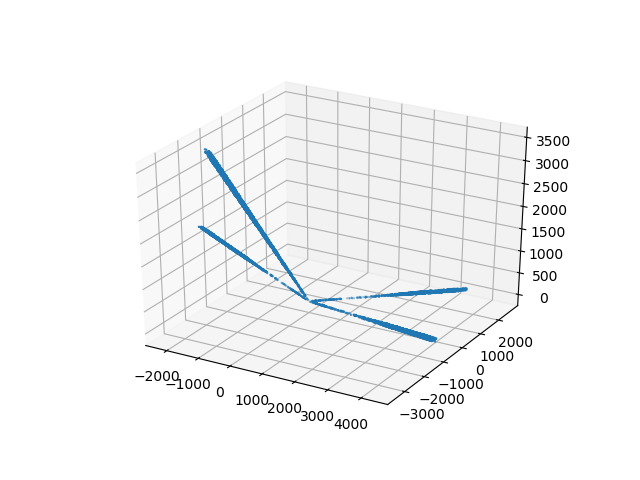

In [15]:
x=deep.x.values
y=deep.y.values
z=deep.z.values

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax=plt.gca()
#ax.set_aspect(1.5)
ax.scatter3D(x, y, z, c=None, cmap=None,s=0.5)


In [3]:
deep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34490 entries, 0 to 34489
Data columns (total 3 columns):
x    34490 non-null float64
y    34490 non-null float64
z    34490 non-null float64
dtypes: float64(3)
memory usage: 808.4 KB


In [4]:
deep_hdu1.head()

,OBJNO,RA,DEC,Z,CLUSTNUM
0,14101753,215.735,53.6535,0.520125,100000
1,14101742,215.817,53.6423,0.913557,100001
2,14101725,215.852,53.6454,1.153350,100002
3,14101719,215.846,53.6251,0.579496,100003
4,14101716,215.891,53.6253,0.991090,100004


In [5]:
deep_hdu2.head()

,CLUSTNUM,FIELD,RA,DEC,Z,VDISP,N_MEMBERS,HIGHPURITY
0,1,1,215.032516,53.101215,0.200645,247.837,15,1
1,2,1,215.314194,53.100807,0.201436,331.092,17,1
2,3,1,215.961456,53.495041,0.192890,632.125,5,1
3,4,1,215.066879,53.171673,0.268658,402.922,10,1
4,5,1,215.164932,53.132248,0.200897,274.536,12,1


In [6]:
deep_hdu2['CLUSTNUM'].max()

2500

In [7]:
deep_hdu2['FIELD'].max()

4

Isso significa que cada braço no gráfico acima representa um FIELD.

In [8]:
deep_hdu2['N_MEMBERS'].min()

2

Para o HDBSCan devemos considerar $\texttt{min_cluster_size}=2$

In [12]:
deep_hdu2['N_MEMBERS'].max()

21

In [9]:
deep_hdu2[deep_hdu2['HIGHPURITY']==1].count()

CLUSTNUM      1433
FIELD         1433
RA            1433
DEC           1433
Z             1433
VDISP         1433
N_MEMBERS     1433
HIGHPURITY    1433
dtype: int64

O número de clusters com alta qualidade é de 1433

In [10]:
deep_hdu2[(deep_hdu2['N_MEMBERS']==2)&(deep_hdu2['HIGHPURITY']==1)].count()

CLUSTNUM      941
FIELD         941
RA            941
DEC           941
Z             941
VDISP         941
N_MEMBERS     941
HIGHPURITY    941
dtype: int64

In [11]:
deep_hdu1[deep_hdu1['CLUSTNUM']>100000].count()

OBJNO       28200
RA          28200
DEC         28200
Z           28200
CLUSTNUM    28200
dtype: int64

O número de galáxias sozinhas é de 28200. No caso do HDBSCan:  $\texttt{outliers}=28200$.

/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/alefe/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


number of cluster-HDBScan method: 4627
For n_clusters HDBScan= 4627 The average silhouette_score is : 0.11809458294999942
Estimated number of noise (outliers) points: 8340
************************************************************************


<IPython.core.display.Javascript object>


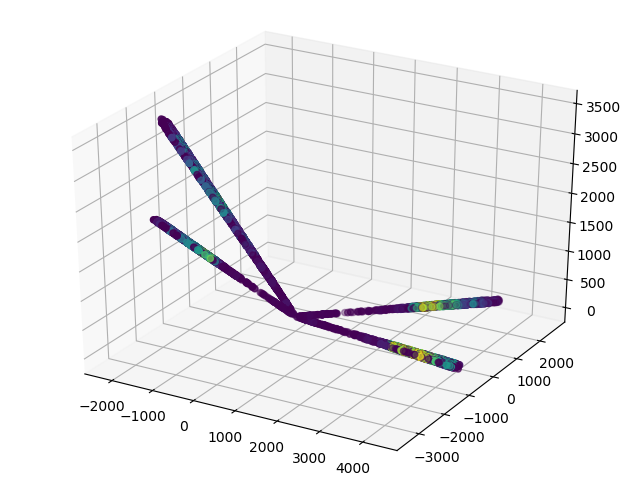

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import hdbscan


X=deep[['x','y','z']].values
#scaler=StandardScaler()
#X=scaler.fit_transform(X)

hdb=hdbscan.HDBSCAN(min_cluster_size=2).fit(X)
labels_hdb=hdb.labels_
print('number of cluster-HDBScan method:',np.max(labels_hdb)+1)
silhouette_avg = silhouette_score(X, labels_hdb)
print("For n_clusters HDBScan=", np.max(labels_hdb)+1,"The average silhouette_score is :", silhouette_avg)
n_noise_ = list(labels_hdb).count(-1)
print('Estimated number of noise (outliers) points: %d' % n_noise_)
print('************************************************************************')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_hdb)

# Comparando com mini-jpas

In [28]:
jpas=pd.read_csv('J_pas_gal_mag_inner_21.csv')
jpas.drop(jpas.index[[0]],inplace=True)
jpas.columns=['TILE_ID','NUMBER','ALPHA_J2000','DELTA_J2000','PHOTOZ','MAG_AUTO','NaN']
del jpas['NaN']

In [29]:
jpas.head()

,TILE_ID,NUMBER,ALPHA_J2000,DELTA_J2000,PHOTOZ,MAG_AUTO
1,1427,4,215.411695913,53.5312728775,0.930000007,20.393
2,1427,6,215.423470024,53.5301448105,0.819999993,20.667
3,1427,31,215.470524481,53.5042869935,0.670000017,20.845
4,1427,32,215.474707856,53.5064194356,0.0,18.945
5,1427,34,215.473157735,53.5054706726,0.0,19.976


In [30]:
jpas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 1 to 1934
Data columns (total 6 columns):
TILE_ID        1934 non-null object
NUMBER         1934 non-null object
ALPHA_J2000    1934 non-null object
DELTA_J2000    1934 non-null object
PHOTOZ         1934 non-null object
MAG_AUTO       1934 non-null object
dtypes: object(6)
memory usage: 105.8+ KB


In [31]:
jpas['TILE_ID']=jpas.TILE_ID.astype(int)
jpas['NUMBER']=jpas.NUMBER.astype(int)
jpas['ALPHA_J2000']=jpas.ALPHA_J2000.astype(float)
jpas['DELTA_J2000']=jpas.DELTA_J2000.astype(float)
jpas['PHOTOZ']=jpas.PHOTOZ.astype(float)
jpas['MAG_AUTO']=jpas.MAG_AUTO.astype(float)

In [32]:
jpas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 1 to 1934
Data columns (total 6 columns):
TILE_ID        1934 non-null int64
NUMBER         1934 non-null int64
ALPHA_J2000    1934 non-null float64
DELTA_J2000    1934 non-null float64
PHOTOZ         1934 non-null float64
MAG_AUTO       1934 non-null float64
dtypes: float64(4), int64(2)
memory usage: 105.8 KB


In [33]:
jpas.to_csv('J_pas_gal_mag_inner_21v2.csv')

In [40]:
jpas_real=pd.read_csv('J_pas_gal_mag_inner_21-realspace.csv',header=None)
jpas_real.columns=['x','y','z']

In [41]:
jpas_real.head()

,x,y,z
0,-1516.290732,-1078.037649,2517.136417
1,-1376.627019,-979.166851,2285.525854
2,-1171.139758,-834.457180,1943.669859
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>


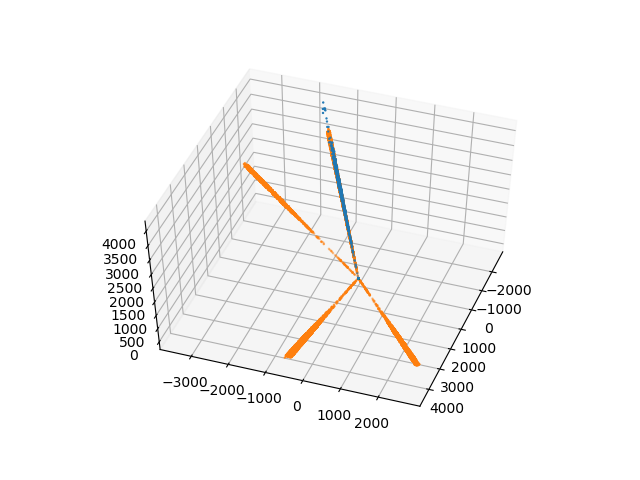

In [51]:
X=jpas_real.x.values
Y=jpas_real.y.values
Z=jpas_real.z.values

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax=plt.gca()
#ax.set_aspect(1.5)
ax.scatter3D(X, Y, Z, c=None, cmap=None,s=0.5)
ax.scatter3D(x,y,z,c=None,cmap=None,s=0.5)

number of cluster-HDBScan method: 120
For n_clusters HDBScan= 120 The average silhouette_score is : 0.5637828997540779
Estimated number of noise (outliers) points: 205
************************************************************************


<IPython.core.display.Javascript object>


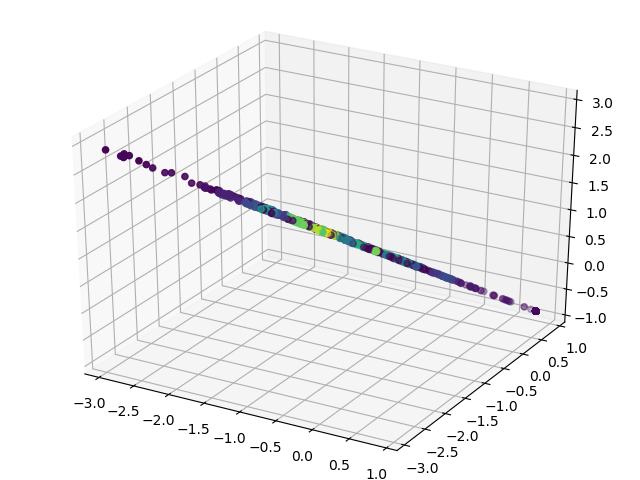

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import hdbscan


X=jpas_real[['x','y','z']].values
scaler=StandardScaler()
X=scaler.fit_transform(X)

hdb=hdbscan.HDBSCAN(min_cluster_size=2).fit(X)
labels_hdb=hdb.labels_
print('number of cluster-HDBScan method:',np.max(labels_hdb)+1)
silhouette_avg = silhouette_score(X, labels_hdb)
print("For n_clusters HDBScan=", np.max(labels_hdb)+1,"The average silhouette_score is :", silhouette_avg)
n_noise_ = list(labels_hdb).count(-1)
print('Estimated number of noise (outliers) points: %d' % n_noise_)
print('************************************************************************')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_hdb)